In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas 

df = pandas.read_csv('data_set/family_data_set.csv')
df.head()

,value,mutant_name_index,kinetic_constant,rel_or_abs,scaffold
0,0.000000,0,kcat,rel,Q59976_4
1,0.000000,0,km,rel,Q59976_4
2,0.000000,0,kcatkm,rel,Q59976_4
3,0.286449,1,kcat,rel,Q59976_4
4,-2.528274,1,km,rel,Q59976_4


In [2]:
targets = 'kcat km kcatkm'.split()

def fmt(k):
    if k == 'kcat':
        return '$k_{\mathrm{cat}}$'
    elif k == 'km':
        return '$K_{\mathrm{M}}$'
    elif k == 'kcatkm':
        return '$k_{\mathrm{cat}}/K_{\mathrm{M}}$'

Average standard deviation (log10) 0.52 kcat


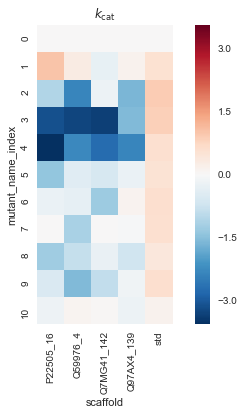

Average standard deviation (log10) 0.77 km


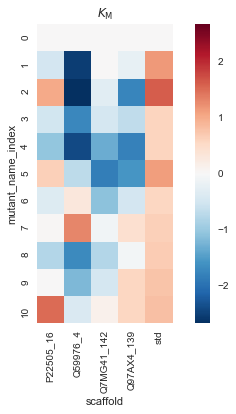

Average standard deviation (log10) 0.90 kcatkm


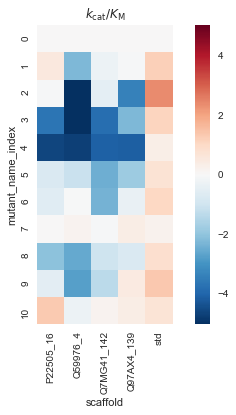

In [3]:
for target in targets:
    d = df[(df.kinetic_constant == target) & (df.rel_or_abs == 'rel')]
    p = d.pivot(columns='scaffold', values='value', index='mutant_name_index')
    p['std'] = p.std(axis=1)
    sns.heatmap(p, square=1)
    plt.title(fmt(target))
    avg_std = '{0:2.2f}'.format(p['std'].mean())    
    print('Average standard deviation (log10)', avg_std, target )
    plt.show()